<a href="https://colab.research.google.com/github/sabeesh90/Multimodal-Architectures-Deep_Learning/blob/main/Thesis_Detailed_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <p style = "text-align:center"><font color  = 'blue'> Thesis Dissertation - Masters

#### Importing libraries

In [ ]:
!pip install pycaret
!pip install lightgbm

     |████████████████████████████████| 264 kB 8.4 MB/s 
     |████████████████████████████████| 271 kB 84.2 MB/s 
     |████████████████████████████████| 248 kB 97.5 MB/s 
     |████████████████████████████████| 167 kB 84.4 MB/s 
     |████████████████████████████████| 56 kB 6.2 MB/s 
     |████████████████████████████████| 6.8 MB 87.1 MB/s 
     |████████████████████████████████| 1.7 MB 73.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 59.1 MB/s 
     |████████████████████████████████| 14.4 MB 84.6 MB/s 
     |████████████████████████████████| 2.0 MB 72.1 MB/s 
     |████████████████████████████████| 105 kB 106.7 MB/s 
     |████████████████████████████████| 80 kB 13.2 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 10.1 MB 59.1 MB/s 
     |████████████████

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from skimage import io
import pathlib
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow.keras.layers import *
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import sklearn 

%load_ext tensorboard
warnings.filterwarnings("ignore")

#### Reading the tabular data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
f = open("tabular_data.csv", "r")
# f = open("D:\Data Science\Thesis\1. Datasets\Thesis 1\SLOAN")
a = f.readlines()
f.close()

##### Reading the first record of the csv file

In [ ]:
print(len(a))
a[1001]

1002


'1237648704055214227,217.618134232202,-0.23442684979355,19.51428,18.67359,18.61282,18.63047,18.35689,752,301,3,495,19.00783,4535127118091407360,QSO,2.62735,4028,55621,8\n'

#### Creating a pandas dataframe for analysis

In [ ]:
df = pd.read_csv("tabular_data.csv", skiprows = [0])
df.head(3)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,fiberMag_g,specobjid,class,redshift,plate,mjd,fiberid
0,1237646587699462283,56.485796,0.843531,17.98595,16.77582,16.22950,16.00589,15.89195,259,301,5,333,17.10288,1837638847656126464,STAR,0.000125,1632,52996,619
1,1237646587699658835,56.901894,0.845330,19.23049,17.21716,16.38172,16.05841,15.88405,259,301,5,336,17.54239,1721609858370791424,STAR,-0.000201,1529,52930,396
2,1237646587709882380,80.224783,0.834251,18.12716,16.95737,16.40913,16.18926,16.05978,259,301,5,492,17.26884,8175272584063242240,STAR,-0.000017,7261,56603,412


In [ ]:
df['class'].value_counts(normalize = True)

STAR      0.498
GALAXY    0.440
QSO       0.062
Name: class, dtype: float64

In [ ]:
classes = ['GALAXY', 'STAR', 'QSO']

In [ ]:
columns = ['u', 'g', 'r', 'i', 'z', 'fiberMag_g', 'class']
df1 = df[columns]
df1.head(3)

,u,g,r,i,z,fiberMag_g,class
0,17.98595,16.77582,16.22950,16.00589,15.89195,17.10288,STAR
1,19.23049,17.21716,16.38172,16.05841,15.88405,17.54239,STAR
2,18.12716,16.95737,16.40913,16.18926,16.05978,17.26884,STAR


#### <font color = "blue"> Univariate analysis

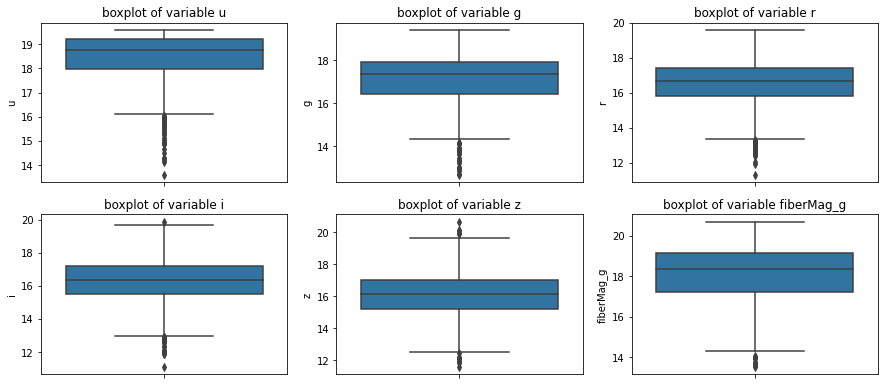

In [ ]:
plt.figure(figsize = (15,10))
for i in range(1, len (df1.columns)):
    plt.subplot(3,3,i)
    sns.boxplot(y = df1[df1.columns[i-1]])
    plt.title('boxplot of variable ' + df1.columns[i-1])
plt.show()

   <font color = 'blue'>
    1.Outliers are present in all the variables present here <br>
    2. Elimination of outliers needs to be done during data preparation stage

 

##### Dsitribution of target variable

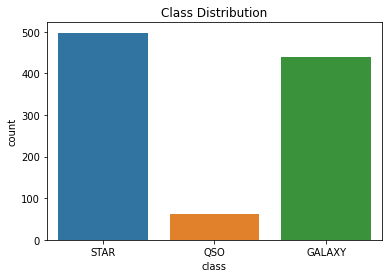

In [ ]:
sns.countplot(x = df1['class'], )
plt.title('Class Distribution')
# plt.savefig('Thesis - architectures/class_imbalance.png', dpi=300, bbox_inches='tight')
plt.show()


#### <font color = "blue"> Bivariate analysis

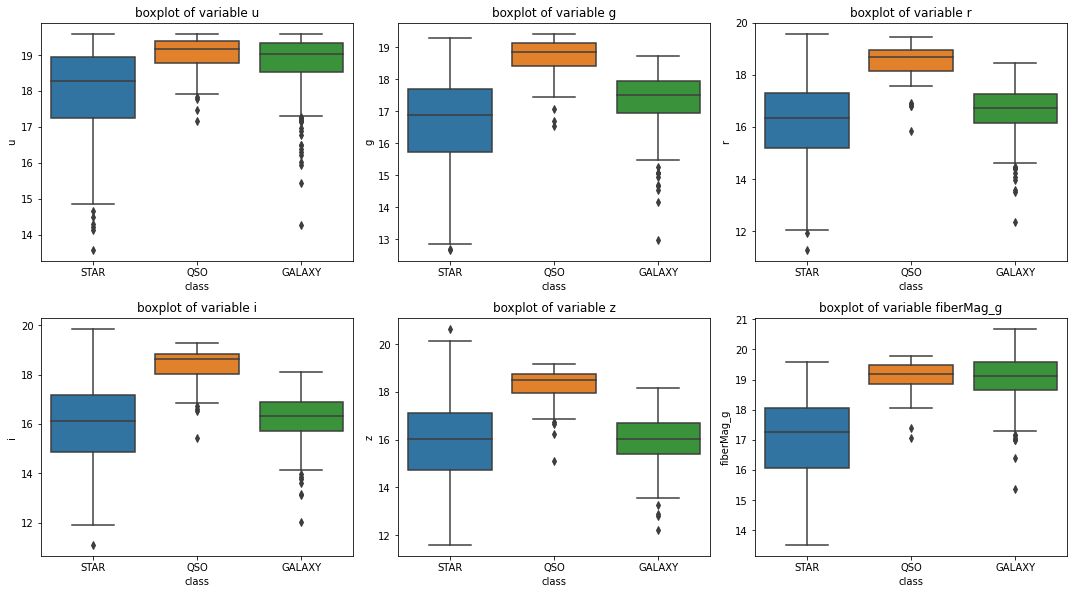

In [ ]:
plt.figure(figsize = (15,12))
for i in range(1, len (df1.columns)):
    plt.subplot(3,3,i)
    sns.boxplot(y = df1[df1.columns[i-1]], x = df1['class'])
    plt.title('boxplot of variable ' + df1.columns[i-1])
    plt.tight_layout(pad=1)
plt.show()

##### Correlation matrix

In [ ]:
df1.corr()

,u,g,r,i,z,fiberMag_g
u,1.000000,0.882630,0.761892,0.698621,0.646904,0.807580
g,0.882630,1.000000,0.953533,0.921637,0.899306,0.832784
r,0.761892,0.953533,1.000000,0.982368,0.964247,0.763866
i,0.698621,0.921637,0.982368,1.000000,0.986483,0.712715
z,0.646904,0.899306,0.964247,0.986483,1.000000,0.665402
fiberMag_g,0.807580,0.832784,0.763866,0.712715,0.665402,1.000000


##### Visualizing the heat map

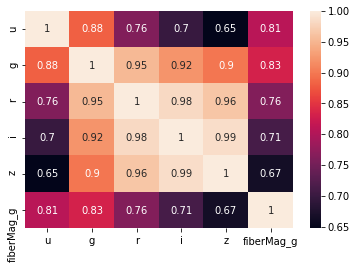

In [ ]:
sns.heatmap(df1.corr(), annot = True)
plt.show()

#### Data preprocessing

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [ ]:
df1.head()

,u,g,r,i,z,fiberMag_g,class
0,17.98595,16.77582,16.22950,16.00589,15.89195,17.10288,STAR
1,19.23049,17.21716,16.38172,16.05841,15.88405,17.54239,STAR
2,18.12716,16.95737,16.40913,16.18926,16.05978,17.26884,STAR
3,18.35316,17.11153,16.61320,16.39966,16.27895,17.42352,STAR
4,18.35388,17.29353,16.86982,16.69375,16.61706,17.61114,STAR


In [ ]:
df2 = df1.copy() # for later use

In [ ]:
df1['class'] = df1['class'].map({'GALAXY':0, 'QSO':1, 'STAR':2})

#### Splitting into train and test dataset

In [ ]:
X = df1.drop(columns = ['class'])
y = df1.pop('class')

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 6)
(700,)
(300, 6)
(300,)


In [ ]:

scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = tf.one_hot(y_train, depth = 3)
y_test = tf.one_hot(y_test, depth = 3)
print(X_train.shape)
print(y_train.shape)

(700, 6)
(700, 3)


#### Building a callback

In [ ]:
model_name_ann = 'sloan_ann' +'/'    
if not os.path.exists(model_name_ann):
    os.mkdir(model_name_ann)        
filepath_ann = model_name_ann + 'model-{epoch:05d}-{loss:.2f}-{accuracy:.4f}-{val_loss:.2f}-{val_accuracy:.4f}.h5'
model_checkpoint_callback_ann = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath_ann,
    monitor='val_accuracy',
    mode='auto',
    save_best_only=True,
    verbose = 1
    )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=5,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
)
callbacks_ann = [reduce_lr]

#### Model building

##### Building a sequential  model

In [ ]:
model  = Sequential()

model.add(Dense(50,input_dim  = 6, activation  = 'relu'))
model.add(Dense(100, activation  = 'relu'))
model.add(Dense(150, activation  = 'relu'))
model.add(Dense(250, activation  = 'relu'))
model.add(Dense(3, activation  = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                350       
_________________________________________________________________
dense_14 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_15 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_16 (Dense)             (None, 250)               37750     
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 753       
Total params: 59,103
Trainable params: 59,103
Non-trainable params: 0
_________________________________________________________________


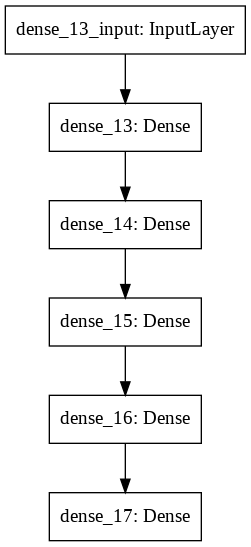

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.fit(X_train, y_train, epochs = 150, batch_size=8,validation_data = (X_test, y_test), callbacks  =  callbacks_ann)

Epoch 1/150
88/88 [==============================] - 1s 5ms/step - loss: 0.9076 - accuracy: 0.4671 - val_loss: 0.8680 - val_accuracy: 0.4933
Epoch 2/150
88/88 [==============================] - 0s 3ms/step - loss: 0.8915 - accuracy: 0.4971 - val_loss: 0.8627 - val_accuracy: 0.4967
Epoch 3/150
88/88 [==============================] - 0s 3ms/step - loss: 0.8832 - accuracy: 0.4986 - val_loss: 0.8516 - val_accuracy: 0.4967
Epoch 4/150
88/88 [==============================] - 0s 3ms/step - loss: 0.8633 - accuracy: 0.5257 - val_loss: 0.8653 - val_accuracy: 0.4933
Epoch 5/150
88/88 [==============================] - 0s 3ms/step - loss: 0.8582 - accuracy: 0.5557 - val_loss: 0.7697 - val_accuracy: 0.8633
Epoch 6/150
88/88 [==============================] - 0s 3ms/step - loss: 0.7255 - accuracy: 0.6971 - val_loss: 0.5651 - val_accuracy: 0.8200
Epoch 7/150
88/88 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.7986 - val_loss: 0.8514 - val_accuracy: 0.6300
Epoch 8/150
8

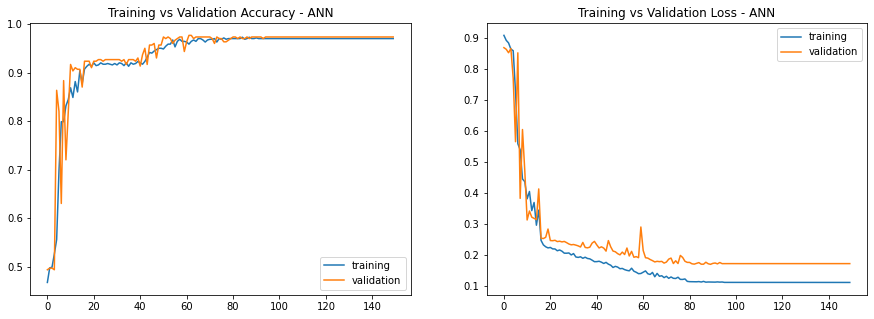

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy - ANN')
plt.legend(['training', 'validation'])
plt.subplot(1,2,2)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training vs Validation Loss - ANN')
plt.show()

##### ANN model without weights

In [ ]:
model.fit(X_train, y_train, epochs = 250, batch_size=8,validation_data = (X_test, y_test), callbacks=callbacks_ann)

Epoch 1/250
88/88 [==============================] - 2s 4ms/step - loss: 0.9177 - accuracy: 0.4757 - val_loss: 0.8673 - val_accuracy: 0.4933

Epoch 00001: val_accuracy improved from -inf to 0.49333, saving model to sloan_ann/model-00001-0.92-0.4757-0.87-0.4933.h5
Epoch 2/250
88/88 [==============================] - 0s 3ms/step - loss: 0.8872 - accuracy: 0.4886 - val_loss: 0.8618 - val_accuracy: 0.4933

Epoch 00002: val_accuracy did not improve from 0.49333
Epoch 3/250
88/88 [==============================] - 0s 3ms/step - loss: 0.8807 - accuracy: 0.4957 - val_loss: 0.8660 - val_accuracy: 0.4933

Epoch 00003: val_accuracy did not improve from 0.49333
Epoch 4/250
88/88 [==============================] - 0s 3ms/step - loss: 0.8694 - accuracy: 0.5186 - val_loss: 0.8401 - val_accuracy: 0.5033

Epoch 00004: val_accuracy improved from 0.49333 to 0.50333, saving model to sloan_ann/model-00004-0.87-0.5186-0.84-0.5033.h5
Epoch 5/250
88/88 [==============================] - 0s 3ms/step - loss: 0.

##### Second ANN model with increased paramters and regularizers

In [ ]:
from keras.regularizers import l1_l2
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=7,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
)

In [ ]:
model  = Sequential()

model.add(Dense(50,input_dim  = 6, activation  = 'relu'))
model.add(Dense(100, activation  = 'relu'))
model.add(Dense(150, activation  = 'relu' , kernel_regularizer=l1_l2(0.01)))
model.add(Dense(300, activation  = 'relu' , kernel_regularizer=l1_l2(0.01)))
model.add(Dense(3, activation  = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                350       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_6 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_7 (Dense)              (None, 300)               45300     
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 903       
Total params: 66,803
Trainable params: 66,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs = 250, batch_size=16,validation_data = (X_test, y_test), callbacks  = reduce_lr)

Epoch 1/250
44/44 [==============================] - 1s 6ms/step - loss: 29.3117 - accuracy: 0.4800 - val_loss: 18.0864 - val_accuracy: 0.4933
Epoch 2/250
44/44 [==============================] - 0s 3ms/step - loss: 11.0589 - accuracy: 0.5000 - val_loss: 5.3336 - val_accuracy: 0.4933
Epoch 3/250
44/44 [==============================] - 0s 3ms/step - loss: 2.8802 - accuracy: 0.5000 - val_loss: 1.4445 - val_accuracy: 0.4933
Epoch 4/250
44/44 [==============================] - 0s 3ms/step - loss: 1.1158 - accuracy: 0.4657 - val_loss: 0.9624 - val_accuracy: 0.4933
Epoch 5/250
44/44 [==============================] - 0s 3ms/step - loss: 0.9669 - accuracy: 0.5000 - val_loss: 0.9481 - val_accuracy: 0.4933
Epoch 6/250
44/44 [==============================] - 0s 3ms/step - loss: 0.9638 - accuracy: 0.5000 - val_loss: 0.9479 - val_accuracy: 0.4933
Epoch 7/250
44/44 [==============================] - 0s 3ms/step - loss: 0.9630 - accuracy: 0.5000 - val_loss: 0.9460 - val_accuracy: 0.4933
Epoch 8/25

##### third ANN model with increased parameters without regulariation

In [ ]:
model  = Sequential()

model.add(Dense(50,input_dim  = 6, activation  = 'relu'))
model.add(Dense(100, activation  = 'relu'))
model.add(Dense(150, activation  = 'relu'))
model.add(Dense(300, activation  = 'relu'))
model.add(Dense(3, activation  = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                350       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_11 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_12 (Dense)             (None, 300)               45300     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 903       
Total params: 66,803
Trainable params: 66,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs = 250, batch_size=16,validation_data = (X_test, y_test), callbacks  = reduce_lr)

Epoch 1/250
44/44 [==============================] - 1s 9ms/step - loss: 0.9222 - accuracy: 0.4700 - val_loss: 0.8735 - val_accuracy: 0.4933
Epoch 2/250
44/44 [==============================] - 0s 3ms/step - loss: 0.8866 - accuracy: 0.4943 - val_loss: 0.8713 - val_accuracy: 0.4933
Epoch 3/250
44/44 [==============================] - 0s 3ms/step - loss: 0.8858 - accuracy: 0.4800 - val_loss: 0.8660 - val_accuracy: 0.4933
Epoch 4/250
44/44 [==============================] - 0s 3ms/step - loss: 0.8854 - accuracy: 0.5014 - val_loss: 0.8649 - val_accuracy: 0.4500
Epoch 5/250
44/44 [==============================] - 0s 3ms/step - loss: 0.8819 - accuracy: 0.4957 - val_loss: 0.8659 - val_accuracy: 0.4933
Epoch 6/250
44/44 [==============================] - 0s 3ms/step - loss: 0.8750 - accuracy: 0.5271 - val_loss: 0.8448 - val_accuracy: 0.6667
Epoch 7/250
44/44 [==============================] - 0s 3ms/step - loss: 0.8721 - accuracy: 0.5357 - val_loss: 0.8273 - val_accuracy: 0.5200
Epoch 8/250
4

##### Model evaluation

In [ ]:
my_ann_model = load_model('./sloan_ann/model-00075-0.20-0.9400-0.18-0.9733.h5')
prediction_classes = np.array([])
true_classes = np.array([])
prediction_classes = np.concatenate([prediction_classes,np.argmax(my_ann_model.predict(X_test), axis = -1)])
true_classes = np.concatenate([true_classes, np.argmax(y_test.numpy(), axis=-1)])

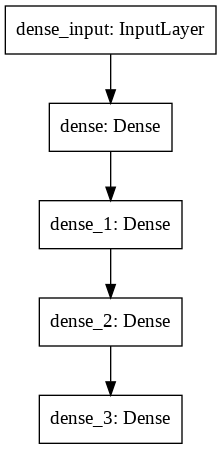

In [ ]:
my_ann_model = load_model('./sloan_ann/model-00075-0.20-0.9400-0.18-0.9733.h5')
tf.keras.utils.plot_model(my_ann_model)

##### evaluating model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(prediction_classes, true_classes))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       138
         1.0       0.82      1.00      0.90        14
         2.0       0.98      0.98      0.98       148

    accuracy                           0.97       300
   macro avg       0.93      0.98      0.95       300
weighted avg       0.97      0.97      0.97       300



In [ ]:
my_ann_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9733


[0.17949095368385315, 0.9733333587646484]

## **PYCARET CLASSIFICATION**

In [ ]:
df2 = df1.copy() # for later use
df3 = df2.copy()
# import K fold cross validation
from sklearn.model_selection import GridSearchCV
# importing models
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import lightgbm as lgbm
# import model metrics assesment
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, precision_recall_curve, classification_report

# Tree model libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [ ]:
df2.head()

,u,g,r,i,z,fiberMag_g,class
0,17.98595,16.77582,16.22950,16.00589,15.89195,17.10288,STAR
1,19.23049,17.21716,16.38172,16.05841,15.88405,17.54239,STAR
2,18.12716,16.95737,16.40913,16.18926,16.05978,17.26884,STAR
3,18.35316,17.11153,16.61320,16.39966,16.27895,17.42352,STAR
4,18.35388,17.29353,16.86982,16.69375,16.61706,17.61114,STAR


In [ ]:
from pycaret.classification import *
k = setup(data = df2, target = 'class', fix_imbalance = True, normalize = True,)
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9629,0.9883,0.9221,0.9673,0.9630,0.9327,0.9345,0.274
lightgbm,Light Gradient Boosting Machine,0.9628,0.9896,0.9297,0.9677,0.9638,0.9330,0.9342,0.150
lr,Logistic Regression,0.9557,0.9888,0.9399,0.9673,0.9588,0.9214,0.9234,0.255
rf,Random Forest Classifier,0.9557,0.9867,0.9322,0.9623,0.9570,0.9202,0.9220,0.305
qda,Quadratic Discriminant Analysis,0.9556,0.9894,0.9179,0.9631,0.9572,0.9206,0.9224,0.013
gbc,Gradient Boosting Classifier,0.9514,0.9877,0.9218,0.9626,0.9538,0.9130,0.9156,0.297
svm,SVM - Linear Kernel,0.9500,0.0000,0.9360,0.9680,0.9549,0.9124,0.9161,0.040
knn,K Neighbors Classifier,0.9485,0.9828,0.9197,0.9597,0.9506,0.9077,0.9107,0.072
ridge,Ridge Classifier,0.9428,0.0000,0.9381,0.9636,0.9490,0.8997,0.9035,0.011
lda,Linear Discriminant Analysis,0.9370,0.9876,0.9338,0.9605,0.9441,0.8900,0.8941,0.013


##  **LOGISTIC REGRESSION**

### NORMAL LOGISTIC REGRESSION

In [ ]:
# Setting up a scaler
scaler_new = MinMaxScaler()

# splitting into x and y
x = df2.drop('class',axis=1)
y = df2['class']

# Train-Test split  
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=21)

# scaling the x and y
x_train_scaled = scaler_new.fit_transform(x_train)
x_test_scaled = scaler_new.transform(x_test)

# converting y into one hot encoding variable 
y_train_scaled = y_train.map({'GALAXY':0, 'QSO':1, 'STAR':2})
y_test_scaled = y_test.map({'GALAXY':0, 'QSO':1, 'STAR':2})

# logistic regression on scaled values
lr = LogisticRegression(multi_class = 'multinomial', class_weight = 'balanced', random_state=21)
lr.fit(x_train_scaled, y_train_scaled)

LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   random_state=21)

In [ ]:
# Accuracy and Logloss Score
from sklearn.metrics import accuracy_score, classification_report, log_loss

print("accuracy : {}".format(accuracy_score(y_test_scaled,lr.predict(x_test_scaled))))
print("logloss : {}".format(log_loss(y_test_scaled,lr.predict_proba(x_test_scaled))))

print(classification_report(y_test_scaled,lr.predict(x_test_scaled),digits = 4))


accuracy : 0.9366666666666666
logloss : 0.3609666578746141
              precision    recall  f1-score   support

           0     0.9919    0.9606    0.9760       127
           1     0.5000    0.9444    0.6538        18
           2     0.9930    0.9161    0.9530       155

    accuracy                         0.9367       300
   macro avg     0.8283    0.9404    0.8610       300
weighted avg     0.9629    0.9367    0.9448       300



In [ ]:
from sklearn.metrics import make_scorer,log_loss, roc_auc_score, recall_score, accuracy_score, f1_score, precision_score , plot_roc_curve#evaluation metrics
print("Accuracy : {}".format(accuracy_score(y_test_scaled,lr.predict(x_test_scaled))))
print("ROC_AUC : {}".format(roc_auc_score(y_test_scaled,lr.predict_proba(x_test_scaled), multi_class='ovr',)))
print("Logloss : {}".format(log_loss(y_test_scaled,lr.predict_proba(x_test_scaled))))

# print("Logloss : {}".format(log_loss(y_test_scaled,lr.predict_proba(x_test_scaled))))

# print(classification_report(y_test_scaled,lr.predict(x_test),labels=[0,1,2]))


Accuracy : 0.9366666666666666
ROC_AUC : 0.9842056119787959
Logloss : 0.3609666578746141


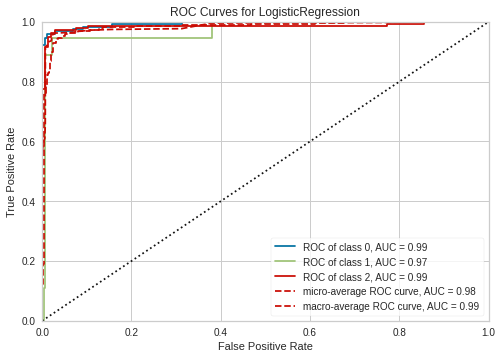

In [ ]:
from yellowbrick.classifier import ROCAUC
lr_unfit = LogisticRegression(multi_class = 'multinomial', class_weight = 'balanced', random_state=21)
visualizer = ROCAUC(lr_unfit, classes=[0, 1, 2])

visualizer.fit(x_train_scaled, y_train_scaled)        # Fit the training data to the visualizer
visualizer.score(x_test_scaled, y_test_scaled)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1,)
n_scores = cross_val_score(lr, x_train_scaled, y_train_scaled, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
n_scores

array([0.9       , 0.92142857, 0.87142857, 0.9       , 0.87857143,
       0.9       , 0.84285714, 0.87142857, 0.92142857, 0.94285714,
       0.87142857, 0.88571429, 0.89285714, 0.89285714, 0.92142857])

### PCA LOGISITC REGRESSION

In [ ]:
pca = PCA(random_state=42)
pca.fit(x_train_scaled)
variances = pca.explained_variance_
variances

array([0.16558365, 0.0201464 , 0.00838752, 0.00075752, 0.00033306,
       0.00020375])

In [ ]:
pca.explained_variance_ratio_
cum_variances  = np.cumsum(pca.explained_variance_ratio_)
print(cum_variances)

[0.84735703 0.95045414 0.99337638 0.99725292 0.99895732 1.        ]


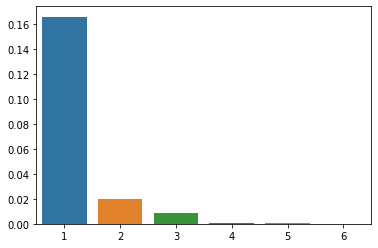

In [ ]:
sns.barplot(x = [i for i in range(1,len(variances)+1)], y = variances)

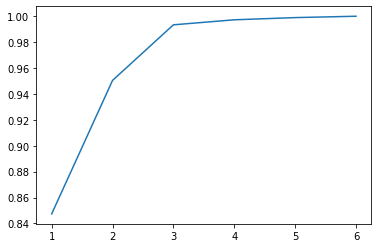

In [ ]:
# Scree Plot
sns.lineplot(x = [i for i in range(1,len(cum_variances)+1)], y = cum_variances)

In [ ]:
# 3 components explain around 99% of the variances
pca2 = PCA(n_components=3, random_state = 42)
PCA_X_train = pca2.fit_transform(x_train_scaled)
PCA_X_test = pca2.transform(x_test_scaled)

In [ ]:
lr_pca = LogisticRegression(multi_class = 'multinomial', class_weight = 'balanced', random_state=21)
lr_pca.fit(PCA_X_train, y_train_scaled)

y_train_predict_pca = lr_pca.predict(PCA_X_train)
y_test_predict_pca = lr_pca.predict(PCA_X_test)


In [ ]:
print(classification_report(y_train_scaled, y_train_predict_pca,digits = 4))
print(classification_report(y_test_scaled, y_test_predict_pca, digits = 4))

              precision    recall  f1-score   support

           0     0.9773    0.9649    0.9711       313
           1     0.4062    0.8864    0.5571        44
           2     0.9695    0.8338    0.8966       343

    accuracy                         0.8957       700
   macro avg     0.7844    0.8950    0.8083       700
weighted avg     0.9376    0.8957    0.9085       700

              precision    recall  f1-score   support

           0     1.0000    0.9606    0.9799       127
           1     0.5000    0.9444    0.6538        18
           2     0.9931    0.9226    0.9565       155

    accuracy                         0.9400       300
   macro avg     0.8310    0.9426    0.8634       300
weighted avg     0.9664    0.9400    0.9483       300



In [ ]:
from yellowbrick.classifier import ROCAUC
def show_roc(model,x_train_scaled=x_train_scaled,y_train_scaled=y_train_scaled, x_test_scaled=x_test_scaled, PCA_X_train = PCA_X_train, PCA_X_test=PCA_X_test):
    visualizer = ROCAUC(model, classes=[0, 1, 2],is_fitted = True)
    visualizer.fit(PCA_X_train, y_train_scaled)
    visualizer.score(PCA_X_test, y_test_scaled)        
    visualizer.show()

##  **RANDOM FOREST AND DECISON TREE**

In [ ]:
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from IPython.display import Image
def tree(rf_model,y):
    data = StringIO()
    export_graphviz(rf_model, out_file = data, filled = True, rounded = True, feature_names = y.columns)
    image = pydotplus.graph_from_dot_data(data.getvalue())
    return Image(image.create_png())

In [ ]:
# Random forest Classifier 
from sklearn.ensemble import RandomForestClassifier


#perform hyperparameter tuning
params = {'n_estimators': [25,50,75],   
          'max_depth': [i for i in range(3,8)],
          'oob_score' :[True]          
         }  

rf = RandomForestClassifier(class_weight='balanced')
# rf.fit(x_train_scaled, y_train_scaled)

rf_pca = RandomForestClassifier(class_weight='balanced')
# rf_pca.fit(PCA_X_train, y_train_scaled)

model_cv = GridSearchCV(estimator = rf,  param_grid = params, 
                         scoring= 'roc_auc_ovr', 
                         cv = 4, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)    

model_cv_pca = GridSearchCV(estimator = rf_pca,  param_grid = params, 
                         scoring= 'roc_auc_ovr', 
                         cv = 4, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)          
model_cv.fit(x_train_scaled, y_train_scaled)
model_cv_pca.fit(PCA_X_train, y_train_scaled)



Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [25, 50, 75], 'oob_score': [True]},
             return_train_score=True, scoring='roc_auc_ovr', verbose=1)

In [ ]:
pd.DataFrame(model_cv.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_oob_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.098754,0.007314,0.011032,0.000414,3,25,True,"{'max_depth': 3, 'n_estimators': 25, 'oob_scor...",0.935030,0.923152,0.971134,0.934838,0.941038,0.018029,15,0.969603,0.972428,0.974947,0.963629,0.970152,0.004214
1,0.185709,0.001799,0.015753,0.000257,3,50,True,"{'max_depth': 3, 'n_estimators': 50, 'oob_scor...",0.932602,0.930017,0.970006,0.945841,0.944617,0.015840,13,0.965638,0.974722,0.968117,0.973540,0.970504,0.003755
2,0.277070,0.002352,0.021930,0.000880,3,75,True,"{'max_depth': 3, 'n_estimators': 75, 'oob_scor...",0.949559,0.930481,0.960211,0.931234,0.942871,0.012593,14,0.970680,0.974089,0.960075,0.966176,0.967755,0.005247


In [ ]:
pd.DataFrame(model_cv_pca.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_oob_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.088971,0.002362,0.011122,0.000332,3,25,True,"{'max_depth': 3, 'n_estimators': 25, 'oob_scor...",0.987340,0.960440,0.989190,0.965072,0.975510,0.012876,15,0.988201,0.990412,0.984234,0.989115,0.987990,0.002307
1,0.176650,0.004369,0.015844,0.000289,3,50,True,"{'max_depth': 3, 'n_estimators': 50, 'oob_scor...",0.988842,0.963075,0.987847,0.964334,0.976024,0.012333,13,0.986713,0.992409,0.987215,0.989403,0.988935,0.002246
2,0.258477,0.005795,0.019722,0.000383,3,75,True,"{'max_depth': 3, 'n_estimators': 75, 'oob_scor...",0.989431,0.962955,0.988852,0.960840,0.975520,0.013644,14,0.987703,0.989812,0.986046,0.989905,0.988366,0.001603


In [ ]:
rf_model = model_cv.best_estimator_
rf_model_pca = model_cv_pca.best_estimator_

In [ ]:
print(rf_model.oob_score_)
print(rf_model_pca.oob_score_)

0.9471428571428572
0.9571428571428572


In [ ]:
y_train_predict = rf_model.predict(x_train_scaled)
y_test_predict = rf_model.predict(x_test_scaled)

y_train_predict_pca = rf_model_pca.predict(PCA_X_train)
y_test_predict_pca = rf_model_pca.predict(PCA_X_test)

print(classification_report(y_train_scaled, y_train_predict, digits = 4))
print(classification_report(y_test_scaled, y_test_predict, digits = 4))

print(classification_report(y_train_scaled, y_train_predict_pca, digits = 4))
print(classification_report(y_test_scaled, y_test_predict_pca, digits = 4))

              precision    recall  f1-score   support

           0     0.9904    0.9840    0.9872       313
           1     0.9767    0.9545    0.9655        44
           2     0.9855    0.9942    0.9898       343

    accuracy                         0.9871       700
   macro avg     0.9842    0.9776    0.9808       700
weighted avg     0.9871    0.9871    0.9871       700

              precision    recall  f1-score   support

           0     1.0000    0.9764    0.9880       127
           1     0.8500    0.9444    0.8947        18
           2     0.9936    1.0000    0.9968       155

    accuracy                         0.9867       300
   macro avg     0.9479    0.9736    0.9599       300
weighted avg     0.9877    0.9867    0.9870       300

              precision    recall  f1-score   support

           0     0.9872    0.9872    0.9872       313
           1     0.9130    0.9545    0.9333        44
           2     0.9912    0.9854    0.9883       343

    accuracy        

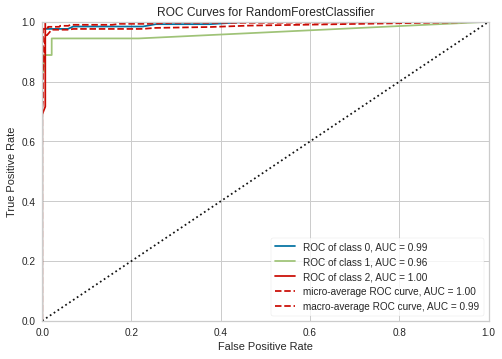

In [ ]:
# from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(rf, classes=[0, 1, 2],is_fitted = True)
visualizer.fit(x_train_scaled, y_train_scaled)
visualizer.score(x_test_scaled, y_test_scaled)        
visualizer.show()


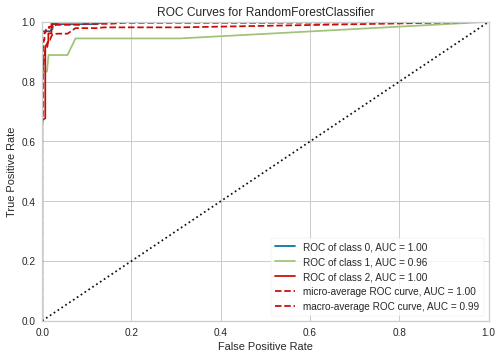

In [ ]:
# from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(rf_pca, classes=[0, 1, 2],is_fitted = True)
visualizer.fit(PCA_X_train, y_train_scaled)
visualizer.score(PCA_X_test, y_test_scaled)        
visualizer.show()


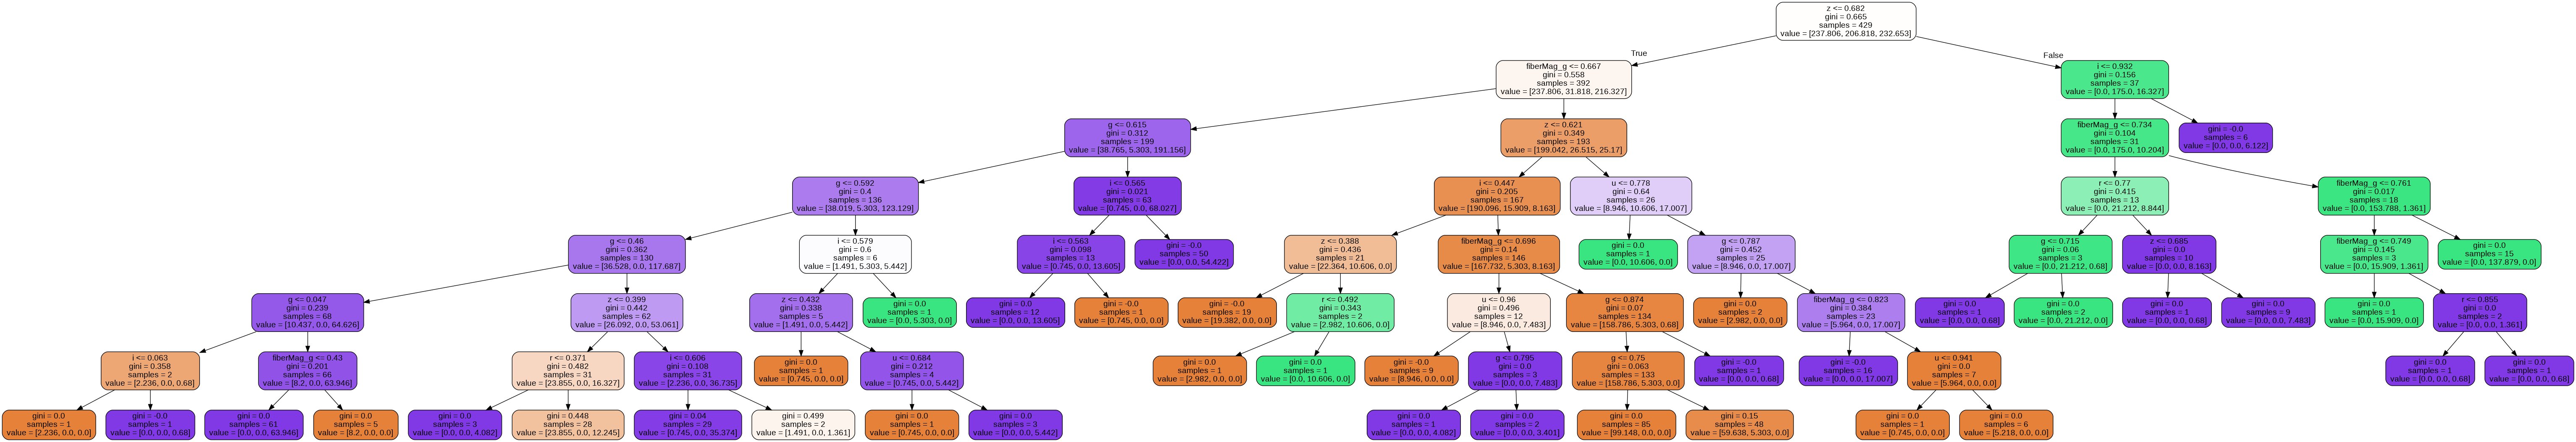

In [ ]:
tree(rf_model.estimators_[0], x_train)

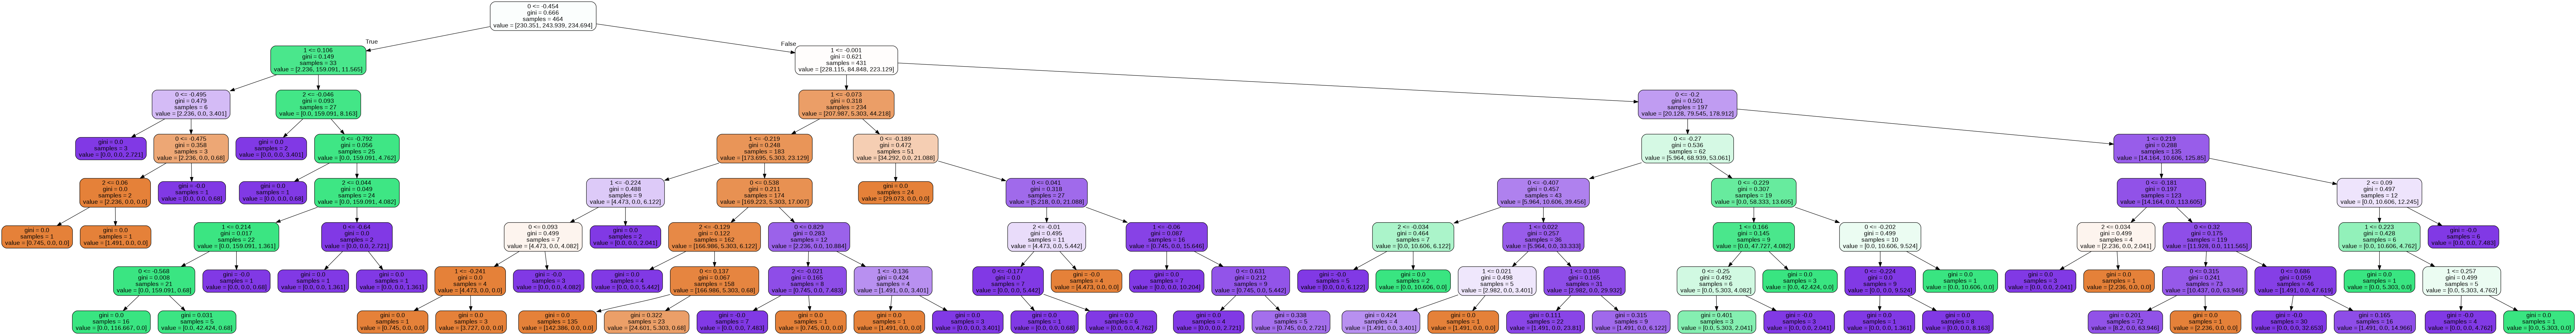

In [ ]:
tree(rf_model_pca.estimators_[0], pd.DataFrame(PCA_X_train))

## **ADABOOST /  LGBM**

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb


# base estimator: a weak learner with max_depth=2
param_grid = {
    'n_estimators': [25,50,100,150],
    'learning_rate':[0.01,0.001]

}

param_grid_lgb = {
    'n_estimators': [50,100,150,200],
    'learning_rate':[0.01,0.001],
    'num_leaves':[15,30,45,60]

}


# Creating the adaboost classifier
ada = AdaBoostClassifier()
lgb_clf = lgb.LGBMClassifier()

ada_grid = GridSearchCV(estimator = ada,  param_grid = param_grid, 
                         scoring= 'roc_auc_ovr', 
                         cv = 4, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)   

ada_grid_pca = GridSearchCV(estimator = ada,  param_grid = param_grid, 
                         scoring= 'roc_auc_ovr', 
                         cv = 4, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)   
lgb_grid = GridSearchCV(estimator = lgb_clf,  param_grid = param_grid_lgb, 
                         scoring= 'roc_auc_ovr', 
                         cv = 4, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)   

lgb_grid_pca = GridSearchCV(estimator = lgb_clf,  param_grid = param_grid_lgb, 
                         scoring= 'roc_auc_ovr', 
                         cv = 4, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1,)    

ada_grid.fit(x_train_scaled,y_train_scaled)
ada_grid_pca.fit(PCA_X_train,y_train_scaled)

lgb_grid.fit(x_train_scaled,y_train_scaled)
lgb_grid_pca.fit(PCA_X_train,y_train_scaled)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    3.6s finished


Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    2.1s finished


Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    9.5s finished


Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    7.4s finished


GridSearchCV(cv=4, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001],
                         'n_estimators': [50, 100, 150, 200],
                         'num_leaves': [15, 30, 45, 60]},
             return_train_score=True, scoring='roc_auc_ovr', verbose=1)

In [ ]:
# ada_model = ada_grid.best_estimator_
ada_model_pca = ada_grid_pca.best_estimator_

# lgb_model = lgb_grid.best_estimator_
# lgb_model_pca = lgb_grid_pca.best_estimator_

In [ ]:
y_train_predict_x = ada_model_pca.predict(PCA_X_train)
y_test_predict_x = ada_model_pca.predict(PCA_X_test)

print(classification_report(y_train_scaled, y_train_predict_x, digits = 4))
print(classification_report(y_test_scaled, y_test_predict_x, digits = 4))

              precision    recall  f1-score   support

           0     0.8125    0.9553    0.8781       313
           1     0.0000    0.0000    0.0000        44
           2     0.8313    0.8047    0.8178       343

    accuracy                         0.8214       700
   macro avg     0.5479    0.5866    0.5653       700
weighted avg     0.7707    0.8214    0.7934       700

              precision    recall  f1-score   support

           0     0.7961    0.9528    0.8674       127
           1     0.0000    0.0000    0.0000        18
           2     0.8446    0.8065    0.8251       155

    accuracy                         0.8200       300
   macro avg     0.5469    0.5864    0.5642       300
weighted avg     0.7734    0.8200    0.7935       300



In [ ]:
y_train_predict = ada_model.predict(x_train_scaled)
y_test_predict = ada_model.predict(x_test_scaled)

print(classification_report(y_train_scaled, y_train_predict, digits = 4))
print(classification_report(y_test_scaled, y_test_predict, digits = 4))


              precision    recall  f1-score   support

           0     0.9437    0.8562    0.8978       313
           1     0.6250    0.6818    0.6522        44
           2     0.8560    0.9184    0.8861       343

    accuracy                         0.8757       700
   macro avg     0.8082    0.8188    0.8120       700
weighted avg     0.8807    0.8757    0.8766       700

              precision    recall  f1-score   support

           0     0.9912    0.8819    0.9333       127
           1     0.6154    0.8889    0.7273        18
           2     0.9193    0.9548    0.9367       155

    accuracy                         0.9200       300
   macro avg     0.8419    0.9085    0.8658       300
weighted avg     0.9315    0.9200    0.9227       300



In [ ]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

cv=KFold(n_splits=10,shuffle=True,random_state=1)

# base estimator: a weak learner with max_depth=2
param_grid = {
    'n_estimators': [25,50,100,150],
    'learning_rate':[0.01,0.001]

}

# Creating the adaboost classifier
ada = AdaBoostClassifier()
# # ada = lgbm.LGBMClassifier()

# ada_grid_pca = GridSearchCV(estimator = ada,  param_grid = param_grid, 
#                          scoring= 'roc_auc_ovr', 
#                          cv = cv, 
#                          n_jobs= -1)   


# with PCA
# hole in the continuum -  unsolved~ .......... :/ :/ :/

# What really is going on inside here?
ada.fit(PCA_X_train,y_train_scaled) # You ve failed me PCA!
# ada_model_pca = ada.best_estimator_
ada_model_pca = ada

y_train_predict_pca_new = ada_model_pca.predict(PCA_X_train)
y_test_predict_pca_new = ada_model_pca.predict(PCA_X_test)
#####................................
print(classification_report(y_train_scaled, y_train_predict_pca_new, digits = 4))
print(classification_report(y_test_scaled, y_test_predict_pca_new, digits = 4))

# print(confusion_matrix(y_train_scaled, y_train_predict_pca_new))
# print(confusion_matrix(y_test_scaled, y_test_predict_pca_new))

              precision    recall  f1-score   support

           0     0.8696    0.9585    0.9119       313
           1     0.6250    0.7955    0.7000        44
           2     0.9565    0.8338    0.8910       343

    accuracy                         0.8871       700
   macro avg     0.8170    0.8626    0.8343       700
weighted avg     0.8968    0.8871    0.8883       700

              precision    recall  f1-score   support

           0     0.8521    0.9528    0.8996       127
           1     0.6957    0.8889    0.7805        18
           2     0.9852    0.8581    0.9172       155

    accuracy                         0.9000       300
   macro avg     0.8443    0.8999    0.8658       300
weighted avg     0.9115    0.9000    0.9016       300



In [ ]:
pip install svc

  Created wheel for svc: filename=SVC-0.1-py3-none-any.whl size=1890 sha256=cf4e7c22d11a0e05b25cf895e974c42ab2867274eca25d5407f02d9c5a418dc2
  Stored in directory: /root/.cache/pip/wheels/a8/05/19/97c2a15450caccc712f403b15e6cd5dc32decd32603156aacb
Successfully built svc


In [ ]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

param_grid = {
    'n_estimators': [25,50,100,150],
    'learning_rate':[0.01,0.001],
    'base_estimator' :[DecisionTreeClassifier(max_depth=i) for i in [1,2,3]]
}

ada = AdaBoostClassifier()
ada_grid_pca = GridSearchCV(estimator = ada,  param_grid = param_grid, 
                         scoring= 'roc_auc_ovr', 
                        #  cv = KFold(n_splits=10,shuffle=True,random_state=1),
                        cv=20,
                         verbose = 1, 
                         n_jobs= -1)   

ada_grid_pca.fit(PCA_X_train,y_train_scaled) # You ve failed me PCA!
ada_model_pca = ada_grid_pca.best_estimator_
# ada_model_pca = ada

y_train_predict_pca_new = ada_model_pca.predict(PCA_X_train)
y_test_predict_pca_new = ada_model_pca.predict(PCA_X_test)
#####................................
print(classification_report(y_train_scaled, y_train_predict_pca_new, digits = 4))
print(classification_report(y_test_scaled, y_test_predict_pca_new, digits = 4))

# print(confusion_matrix(y_train_scaled, y_train_predict_pca_new))
# print(confusion_matrix(y_test_scaled, y_test_predict_pca_new))

Fitting 20 folds for each of 24 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   31.0s finished


              precision    recall  f1-score   support

           0     0.9811    0.9936    0.9873       313
           1     0.9737    0.8409    0.9024        44
           2     0.9797    0.9854    0.9826       343

    accuracy                         0.9800       700
   macro avg     0.9782    0.9400    0.9574       700
weighted avg     0.9799    0.9800    0.9796       700

              precision    recall  f1-score   support

           0     0.9688    0.9764    0.9725       127
           1     1.0000    0.6667    0.8000        18
           2     0.9500    0.9806    0.9651       155

    accuracy                         0.9600       300
   macro avg     0.9729    0.8746    0.9125       300
weighted avg     0.9609    0.9600    0.9583       300



In [ ]:
pd.DataFrame(ada_grid_pca.cv_results_).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.0625,0.003911,0.008342,0.00019,0.01,25,"{'learning_rate': 0.01, 'n_estimators': 25}",0.788571,0.76,0.828571,0.851429,0.807143,0.035312,7,0.820952,0.834286,0.811429,0.801905,0.817143,0.011971


In [ ]:
y_train_predict = lgb_model.predict(x_train_scaled)
y_test_predict = lgb_model.predict(x_test_scaled)

y_train_predict_pca = lgb_model_pca.predict(PCA_X_train)
y_test_predict_pca = lgb_model_pca.predict(PCA_X_test)

print(classification_report(y_train_scaled, y_train_predict, digits = 4))
print(classification_report(y_test_scaled, y_test_predict, digits = 4))

print(classification_report(y_train_scaled, y_train_predict_pca, digits = 4))
print(classification_report(y_test_scaled, y_test_predict_pca, digits = 4))

              precision    recall  f1-score   support

           0     0.9936    0.9904    0.9920       313
           1     1.0000    0.8409    0.9136        44
           2     0.9772    1.0000    0.9885       343

    accuracy                         0.9857       700
   macro avg     0.9903    0.9438    0.9647       700
weighted avg     0.9860    0.9857    0.9853       700

              precision    recall  f1-score   support

           0     0.9920    0.9764    0.9841       127
           1     0.8889    0.8889    0.8889        18
           2     0.9809    0.9935    0.9872       155

    accuracy                         0.9800       300
   macro avg     0.9539    0.9529    0.9534       300
weighted avg     0.9801    0.9800    0.9800       300

              precision    recall  f1-score   support

           0     0.9778    0.9872    0.9825       313
           1     0.9512    0.8864    0.9176        44
           2     0.9796    0.9796    0.9796       343

    accuracy        

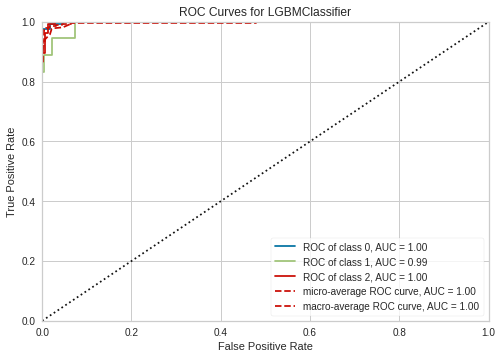

In [ ]:
visualizer = ROCAUC(lgb_model, classes=[0, 1, 2],is_fitted = True)
visualizer.fit(x_train_scaled, y_train_scaled)
visualizer.score(x_test_scaled, y_test_scaled)        
visualizer.show()



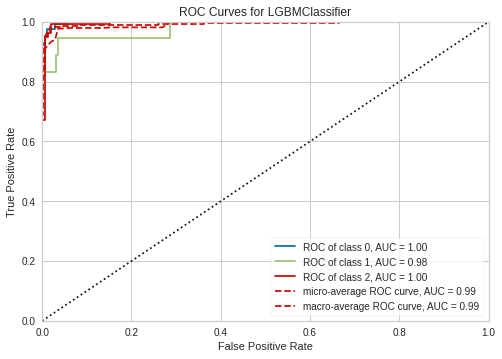

In [ ]:
visualizer = ROCAUC(lgb_model_pca, classes=[0, 1, 2],is_fitted = True)
visualizer.fit(PCA_X_train, y_train_scaled)
visualizer.score(PCA_X_test, y_test_scaled)        
visualizer.show()

## **QUADRATIC DISCRIMINATIVE ANALYSIS**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

param_grid = {
    # 'n_estimators': [50,100,150,200],
    'reg_param':[0.01,0.001],
    # 'num_leaves':[15,30,45,60]
}


# Creating the adaboost classifier
qda = QuadraticDiscriminantAnalysis()

qda_grid = GridSearchCV(estimator = qda,  param_grid = param_grid, 
                         scoring= 'roc_auc_ovr', 
                         cv = 4, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)   

qda_grid_pca = GridSearchCV(estimator = qda,  param_grid = param_grid, 
                         scoring= 'roc_auc_ovr', 
                         cv = 4, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)   

qda_grid.fit(x_train_scaled,y_train_scaled)
qda_grid_pca.fit(PCA_X_train,y_train_scaled)


Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


GridSearchCV(cv=4, estimator=QuadraticDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'reg_param': [0.01, 0.001]}, return_train_score=True,
             scoring='roc_auc_ovr', verbose=1)

In [ ]:
qda_model = qda_grid.best_estimator_
qda_model_pca = qda_grid_pca.best_estimator_

In [ ]:
y_train_predict = qda_model.predict(x_train_scaled)
y_test_predict = qda_model.predict(x_test_scaled)

y_train_predict_pca = qda_model_pca.predict(PCA_X_train)
y_test_predict_pca = qda_model_pca.predict(PCA_X_test)

print(classification_report(y_train_scaled, y_train_predict, digits = 4))
print(classification_report(y_test_scaled, y_test_predict, digits = 4))

print(classification_report(y_train_scaled, y_train_predict_pca, digits = 4))
print(classification_report(y_test_scaled, y_test_predict_pca, digits = 4))

              precision    recall  f1-score   support

           0     0.9935    0.9776    0.9855       313
           1     0.8293    0.7727    0.8000        44
           2     0.9658    0.9883    0.9769       343

    accuracy                         0.9700       700
   macro avg     0.9295    0.9129    0.9208       700
weighted avg     0.9696    0.9700    0.9697       700

              precision    recall  f1-score   support

           0     1.0000    0.9685    0.9840       127
           1     0.8000    0.8889    0.8421        18
           2     0.9873    1.0000    0.9936       155

    accuracy                         0.9800       300
   macro avg     0.9291    0.9525    0.9399       300
weighted avg     0.9814    0.9800    0.9804       300

              precision    recall  f1-score   support

           0     0.9807    0.9744    0.9776       313
           1     0.7692    0.6818    0.7229        44
           2     0.9486    0.9679    0.9582       343

    accuracy        

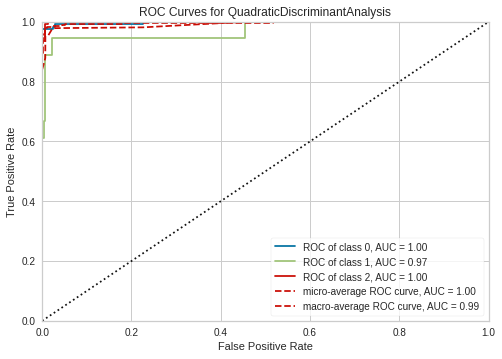

In [ ]:
visualizer = ROCAUC(qda_model, classes=[0, 1, 2],is_fitted = True)
visualizer.fit(x_train_scaled, y_train_scaled)
visualizer.score(x_test_scaled, y_test_scaled)        
visualizer.show()


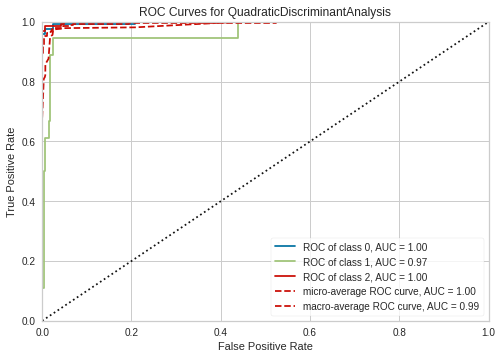

In [ ]:
visualizer = ROCAUC(qda_model_pca, classes=[0, 1, 2],is_fitted = True)
visualizer.fit(PCA_X_train, y_train_scaled)
visualizer.score(PCA_X_test, y_test_scaled)        
visualizer.show()



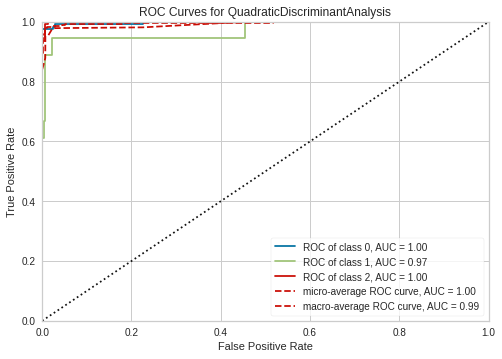

In [ ]:
visualizer = ROCAUC(qda_model, classes=[0, 1, 2],is_fitted = True)
visualizer.fit(x_train_scaled, y_train_scaled)
visualizer.score(x_test_scaled, y_test_scaled)        
visualizer.show()

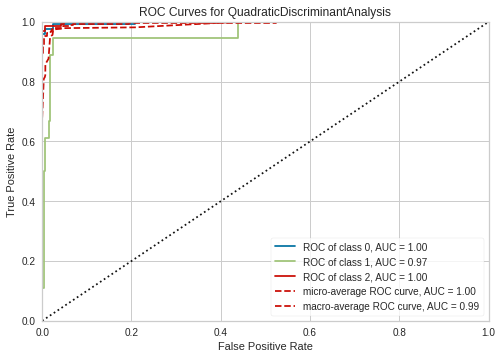

In [ ]:
visualizer = ROCAUC(qda_model_pca, classes=[0, 1, 2],is_fitted = True)
visualizer.fit(PCA_X_train, y_train_scaled)
visualizer.score(PCA_X_test, y_test_scaled)        
visualizer.show()